Practical 6

Text classification using NN of text corpus

Input
Text corpus (It can be a collection of text documents or a set of tweets or emails)

Output
Prediction.

Process
Collect or construct a text corpus.
Identify appropriate task on the corpus. (Some possible examples are given at the end of this manual)
Preprocess the text data and represent them in suitable form so as to feed to the ML model.
Determine the architecture of ANN for the selected task.
Train the neural model on the dataset and predict the class.
Note: As this is a classification task, your training data should be labeled.


In [21]:
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense

# Load the dataset
df = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
# Preprocessing
# nltk.download('stopwords')
stop_words = stopwords.words('english')

def preprocess_text(text):
    if text is np.nan:
        return ''
    text = re.sub('[^a-zA-Z]', ' ', text)  # remove non-alphabetic characters
    text = text.lower()  # convert to lowercase
    text = text.split()  # split into words
    text = [word for word in text if not word in stop_words]  # remove stop words
    text = ' '.join(text)  # join words into text
    return text

df['text'] = df['text'].apply(preprocess_text)
df['Location'] = df['Location'].apply(preprocess_text)
test['text'] = test['text'].apply(preprocess_text)
test['Location'] = test['Location'].apply(preprocess_text)

# Represent the text data
df['mix'] = df['text'] + df['TweetAt'] + df['Location']
test['mix'] = test['text'] + test['TweetAt'] + test['Location']
cv = CountVectorizer(max_features=5000, ngram_range=(1, 3), stop_words=stop_words, max_df=0.8, min_df=2)
X = cv.fit_transform(df['mix']).toarray()
x_test = cv.transform(test['mix']).toarray()


In [22]:
X

array([[1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [23]:
# y one hot encoding
y = pd.get_dummies(df['Sentiment']).values
y_test = pd.get_dummies(test['Sentiment']).values

In [24]:
# y = df['Sentiment'].values

from keras.layers import Dropout
from keras.regularizers import l2
# import early stopping
from keras.callbacks import EarlyStopping
 


# Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
 
 
# Build the neural network
model = Sequential()
model.add(Dense(units=1000, activation='relu', input_dim=5000))
# add dropout to prevent overfitting
model.add(Dropout(0.3))
model.add(Dense(units=700, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(units=400, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(units=100, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(units=5, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history = model.fit(X, y, epochs=5, batch_size=100,  callbacks=[EarlyStopping(monitor='loss', patience=2, verbose=0, mode='auto')])

# Evaluate the model
loss, accuracy = model.evaluate(x_test, y_test)
print('Test Accuracy:', accuracy)

Epoch 1/5
412/412 [==============================] - 22s 50ms/step - loss: 0.4054 - accuracy: 0.4860
Epoch 2/5
412/412 [==============================] - 20s 49ms/step - loss: 0.2941 - accuracy: 0.6872
Epoch 3/5
412/412 [==============================] - 20s 48ms/step - loss: 0.2052 - accuracy: 0.8016
Epoch 4/5
412/412 [==============================] - 21s 50ms/step - loss: 0.1302 - accuracy: 0.8822
Epoch 5/5
119/119 [==============================] - 2s 13ms/step - loss: 0.5837 - accuracy: 0.5793
Test Accuracy: 0.5792522430419922


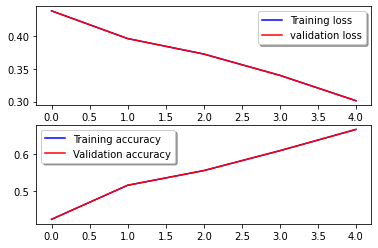

In [20]:
# plot the loss and accuracy curves for training and validation
# history_dict = history.history
import matplotlib.pyplot as plt
fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(history.history['accuracy'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)
 
plt.show()
# history_dict.keys()

In [17]:
test = pd.read_csv('test.csv')
test['text'] = test['text'].apply(preprocess_text)
X_test = cv.transform(test['text']).toarray()
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)
y_pred = pd.DataFrame(y_pred, columns=['Sentiment'])
y_pred['Sentiment'] = y_pred['Sentiment'].replace({0: 'Extremely Negative', 1: 'Negative', 2: 'Neutral', 3: 'Positive', 4: 'Extremely Positive'})
y_pred.to_csv('submission.csv', index=False)
 

119/119 [==============================] - 0s 2ms/step
